<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/airline_passenger_satisfaction.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [5]:
column_datatypes = data.dtypes

print("Datatypes of all columns:")
print(column_datatypes)

Datatypes of all columns:
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes     

HANDLING MISSING VALUES

In [6]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
data.count()

Gender                               103904
Customer Type                        103904
Age                                  103904
Type of Travel                       103904
Class                                103904
Flight Distance                      103904
Inflight wifi service                103904
Departure/Arrival time convenient    103904
Ease of Online booking               103904
Gate location                        103904
Food and drink                       103904
Online boarding                      103904
Seat comfort                         103904
Inflight entertainment               103904
On-board service                     103904
Leg room service                     103904
Baggage handling                     103904
Checkin service                      103904
Inflight service                     103904
Cleanliness                          103904
Departure Delay in Minutes           103904
Arrival Delay in Minutes             103594
satisfaction                    

In [8]:
mean_value= data['Arrival Delay in Minutes'].mean
data['Arrival Delay in Minutes'].fillna(mean_value, inplace=True)

In [ ]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

BINNING OF AGE

In [9]:
bin_edges = [10, 26, 36, 46, 69, 80]
bin_labels = ['10-25', '26-35', '36-45', '46-68', '69-80']

data['Age Group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels, right=False)

In [10]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,10-25
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,10-25
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,26-35
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,10-25
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,46-68


DISTRIBUTION OF AGE ACROSS VARIOUS AGE GROUPS(BINS)

In [11]:
customer_counts = data['Age Group'].value_counts().sort_index()

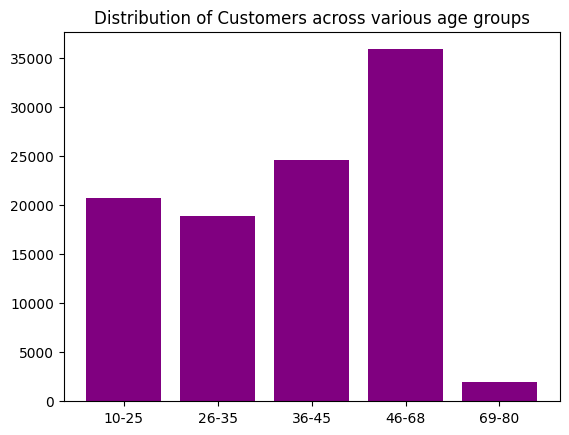

In [12]:
plt.bar(customer_counts.index, customer_counts.values, color='purple')
plt.title('Distribution of Customers across various age groups')
plt.show()

CORRELATION, EXPLORATORY DATA ANALYSIS AND HEATMAP VISUALIZATION

In [13]:
corr_matrix = data.corr()

<ipython-input-13-bf8eb1dc5e60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [14]:
corr_matrix

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
Age,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152
Flight Distance,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158
Inflight wifi service,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402
Departure/Arrival time convenient,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005
Ease of Online booking,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371
Gate location,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467
Food and drink,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926
Online boarding,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982
Seat comfort,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898
Inflight entertainment,0.076444,0.128740,0.209321,-0.004861,0.047032,0.003517,0.622512,0.285066,0.610590,1.000000,0.420153,0.299692,0.378210,0.120867,0.404855,0.691815,-0.027489


<Axes: >

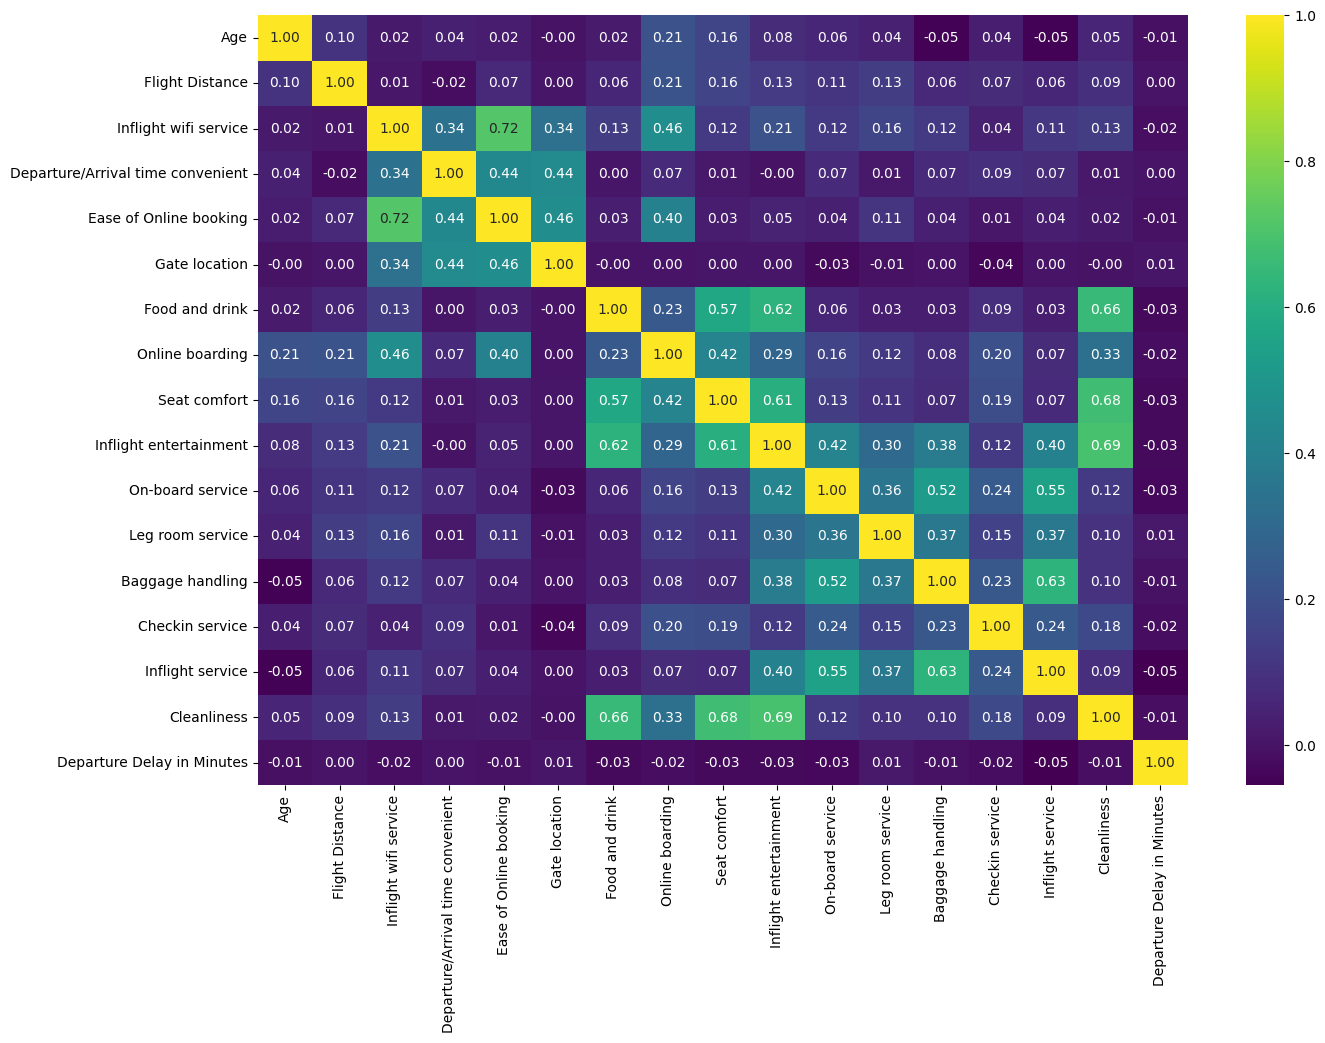

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis')

In [16]:
data.describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00
mean,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82
std,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00
50%,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00
75%,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  object  
 1   Customer Type                      103904 non-null  object  
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  object  
 4   Class                              103904 non-null  object  
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

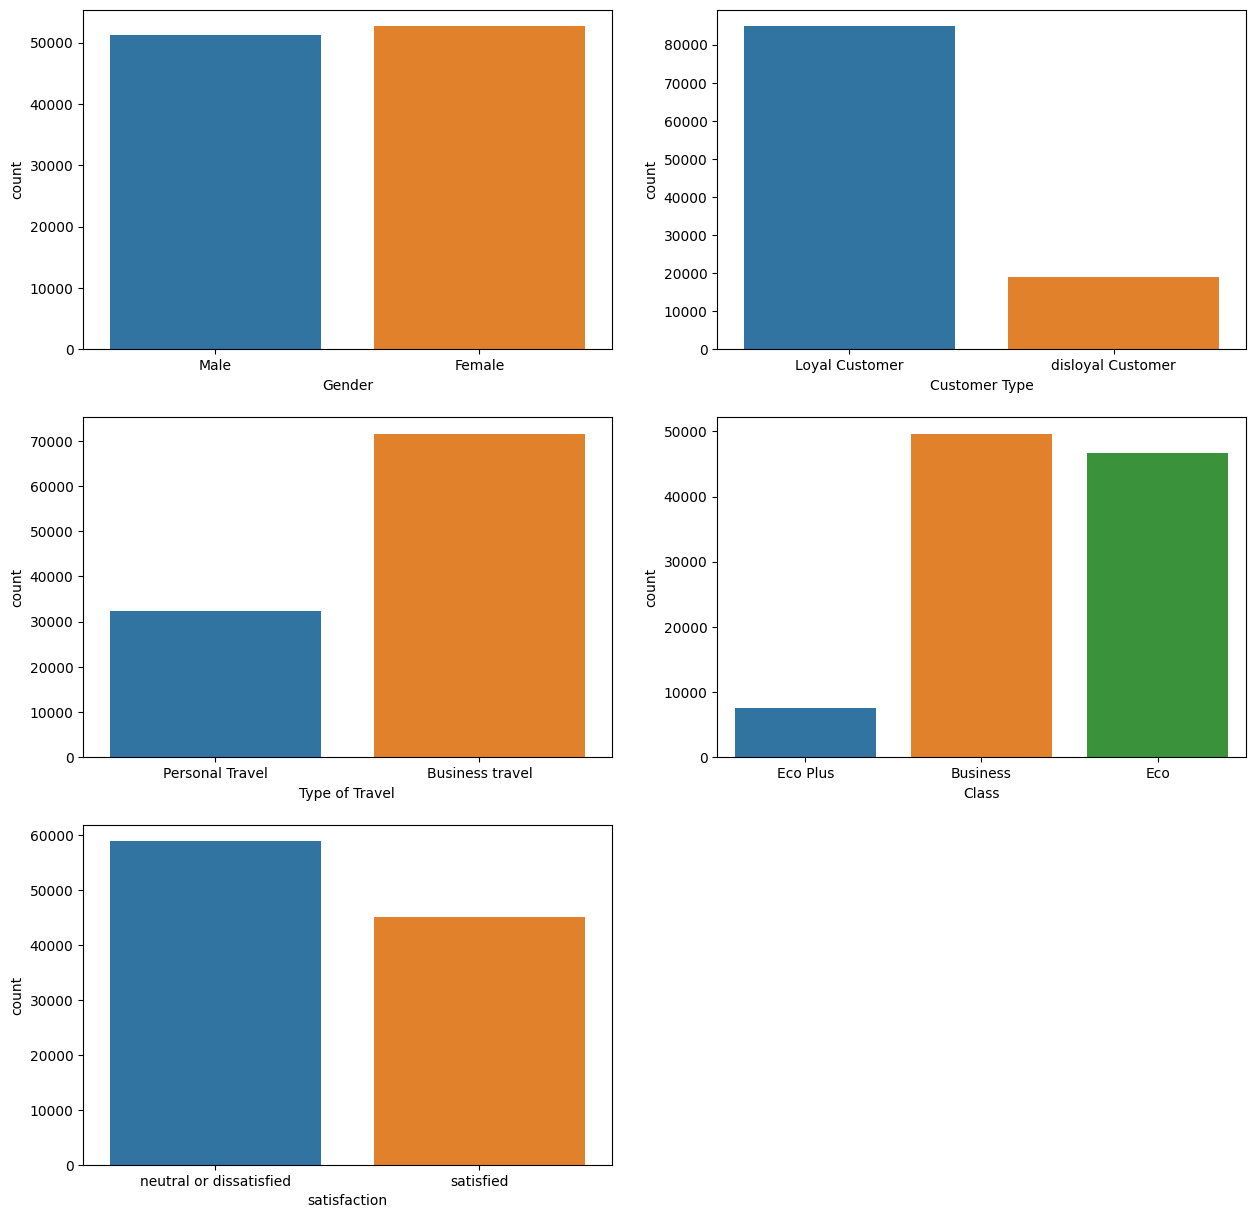

In [18]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=data)
plt.show()

ONE HOT ENCODING

In [19]:
data_to_encode= data[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']]
data_encoded = pd.get_dummies(data_to_encode, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'])

In [20]:
data_encoded.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,0,1,1,0,0,1,0,0,1,1,0
1,0,1,0,1,1,0,1,0,0,1,0
2,1,0,1,0,1,0,1,0,0,0,1
3,1,0,1,0,1,0,1,0,0,1,0
4,0,1,1,0,1,0,1,0,0,0,1


CHI-SQUARE TEST FOR INDEPENDENCE

In [21]:
from sklearn.preprocessing import LabelEncoder
for col in data_to_encode.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data_to_encode[col])

In [22]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,1,0,13,1,2,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,10-25
1,1,1,25,0,0,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,10-25
2,0,0,26,0,0,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,26-35
3,0,0,25,0,0,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,10-25
4,1,0,61,0,0,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,46-68


In [23]:
from sklearn.feature_selection import chi2
X= data.drop(columns= ['satisfaction', 'Age Group', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])
Y = data['satisfaction']

In [24]:
chi_scores=chi2(X,Y)

In [25]:
chi_scores

(array([7.86239874e+00, 2.98997606e+03, 1.13415143e+04, 1.44457486e+04,
        1.36068763e+04, 5.42233398e+03, 2.10260147e+02, 2.17452495e+03,
        2.65017285e-02, 2.52791323e+03, 1.47619572e+04, 6.41926032e+03,
        8.71118195e+03, 5.29933735e+03, 5.26197662e+03, 2.44881538e+03,
        2.80844476e+03, 2.36294675e+03, 5.07137639e+03]),
 array([5.04733869e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.20533919e-47, 0.00000000e+00,
        8.70681015e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

<Axes: >

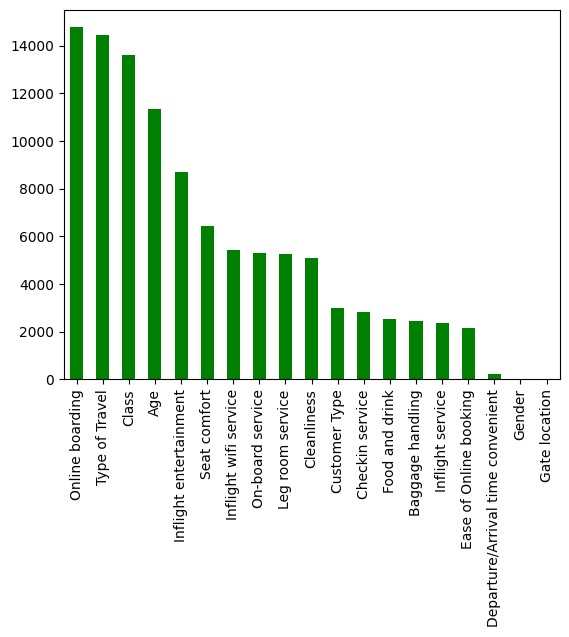

In [27]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar(color='green')

In [28]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected  = chi2_contingency(chi_scores)

In [29]:
print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:{expected}")

Chi-Square Value: 102154.01412147623
P-Value: 0.0
Degrees of Freedom: 18
Expected Frequencies:[[7.86738100e+00 2.98995133e+03 1.13414205e+04 1.44456291e+04
  1.36067638e+04 5.42228913e+03 2.10258408e+02 2.17450696e+03
  8.97175322e-01 2.52789232e+03 1.47618351e+04 6.41920723e+03
  8.71110989e+03 5.29929352e+03 5.26193309e+03 2.44879513e+03
  2.80842153e+03 2.36292721e+03 5.07133444e+03]
 [6.50754394e-05 2.47315335e-02 9.38111323e-02 1.19487751e-01
  1.12549034e-01 4.48507385e-02 1.73916304e-03 1.79865442e-02
  7.42103100e-06 2.09095891e-02 1.22103265e-01 5.30967969e-02
  7.20543856e-02 4.38333741e-02 4.35243454e-02 2.02553326e-02
  2.32300006e-02 1.95450718e-02 4.19477991e-02]]


P-TEST

In [30]:
alpha = 0.05
if p_value <= alpha:
    print('Null Hypothesis is rejected; there is a significant relationship between Satisfaction and other attributes.')
else:
    print('Null Hypothesis is accepted; there is no significant relationship between Satisfaction and other attributes.')

Null Hypothesis is rejected; there is a significant relationship between Satisfaction and other attributes.


COVARIANCE MATRIX

In [31]:
cov_attributes = data[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Inflight wifi service' ,'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']]
cov_matrix = cov_attributes.cov()

In [32]:
cov_matrix

,Gender,Customer Type,Type of Travel,Class,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Gender,0.249947,-0.006130,0.001598,-0.003995,0.003025,0.005958,0.006970,0.004861,0.000213,0.003837,-0.028512,-0.017478,0.004077,0.005253,0.020914,0.022075,0.006682,0.023164,0.004268
Customer Type,-0.006130,0.149308,-0.055121,0.010228,-0.035929,-0.003870,-0.121907,-0.010546,0.003001,-0.030544,-0.098692,-0.081289,-0.056622,-0.028157,-0.024334,0.011281,-0.015733,0.010298,-0.042397
Type of Travel,0.001598,-0.055121,0.214044,0.139897,-0.102938,-0.064556,0.183282,-0.086410,-0.018147,-0.039022,-0.140355,-0.075918,-0.091395,-0.033703,-0.084484,-0.017112,0.009807,-0.012292,-0.048088
Class,-0.003995,0.010228,0.139897,0.385391,-0.138224,-0.019052,0.085135,-0.081920,-0.003560,-0.063588,-0.248871,-0.172095,-0.148149,-0.166159,-0.161157,-0.120227,-0.123421,-0.115757,-0.102637
satisfaction,0.003025,-0.035929,-0.102938,-0.138224,0.245558,0.187030,-0.038996,0.119030,0.000432,0.138313,0.336745,0.228426,0.262937,0.205818,0.204140,0.144979,0.148093,0.142582,0.198464
Inflight wifi service,0.005958,-0.003870,-0.064556,-0.019052,0.187030,1.763131,0.696299,1.329731,0.570433,0.237829,0.818853,0.214838,0.370495,0.207852,0.280330,0.189612,0.072574,0.172408,0.231223
Departure/Arrival time convenient,0.006970,-0.121907,0.183282,0.085135,-0.038996,0.696299,2.325854,0.932245,0.866595,0.009948,0.144312,0.022821,-0.009883,0.135343,0.024962,0.129896,0.180116,0.131456,0.028604
Ease of Online booking,0.004861,-0.010546,-0.086410,-0.081920,0.119030,1.329731,0.932245,1.957004,0.819756,0.059282,0.762839,0.055385,0.087704,0.069989,0.198034,0.064035,0.019615,0.058011,0.029700
Gate location,0.000213,0.003001,-0.018147,-0.003560,0.000432,0.570433,0.866595,0.819756,1.632315,-0.001968,0.002910,0.006183,0.005989,-0.046703,-0.009872,0.003490,-0.057275,0.002525,-0.006421
Food and drink,0.003837,-0.030544,-0.039022,-0.063588,0.138313,0.237829,0.009948,0.059282,-0.001968,1.767657,0.420687,1.007640,1.103250,0.101187,0.056843,0.054553,0.146871,0.053134,1.147600


<Axes: >

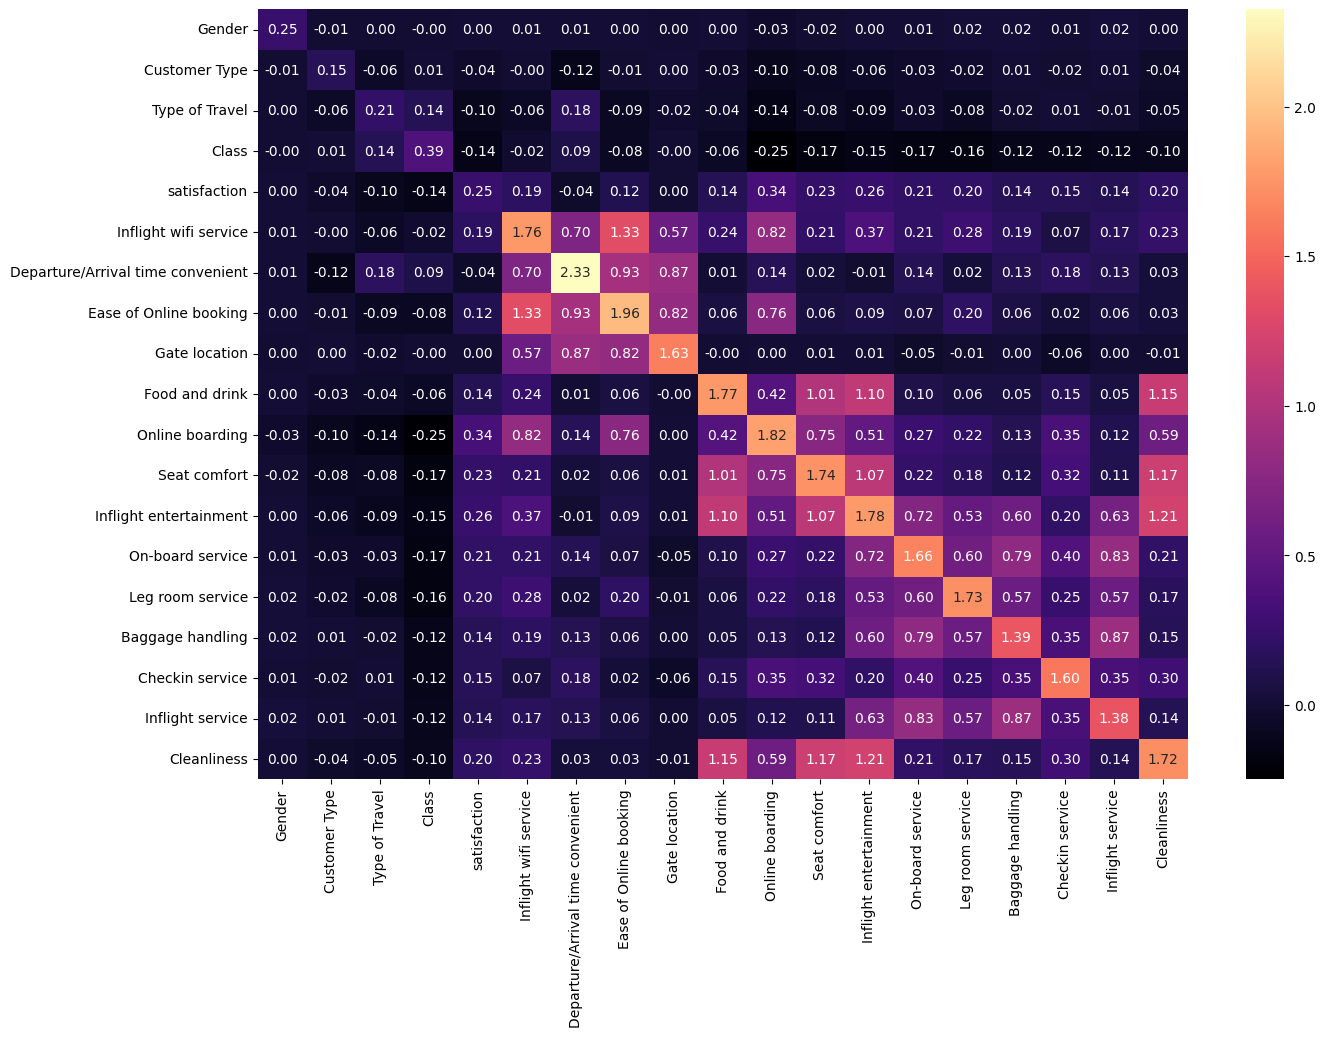

In [39]:
plt.figure(figsize=(15, 10))
sns.heatmap(cov_matrix,  annot=True, fmt='.2f', cmap='magma')

INDEPENDENT TWO-SAMPLE T-TEST

In [47]:
from scipy.stats import ttest_ind
t_statistic, p_value= ttest_ind(X,Y)


In [48]:
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: [  27.11292332 -128.57797702  830.12363544  -58.46393558   65.25462717
  522.27346572  528.06124844  504.66999088  598.30583728  629.01649982
  631.63683441  687.66017049  662.94896479  688.65315135  668.99915355
  805.06070409  680.98075872  810.28025214  655.61713148]
p-value: [1.32854309e-161 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [49]:
alpha = 0.05
if p_value[0] < alpha:
  print('Null Hypothesis is rejected; there is a significant relationship between Satisfaction and other attributes.')
else:
  print('Null Hypothesis is accepted; there is no significant relationship between Satisfaction and other attributes.')

Null Hypothesis is rejected; there is a significant relationship between Satisfaction and other attributes.


<Axes: >

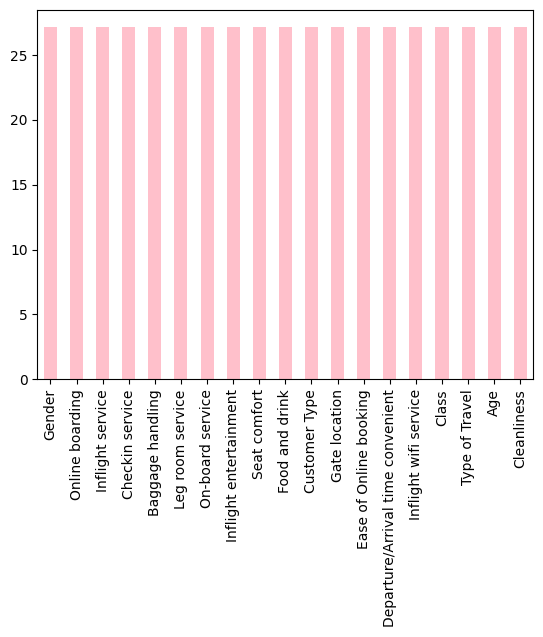

In [53]:
ttest_values=pd.Series(t_statistic[0],index=X.columns)
ttest_values.sort_values(ascending=False,inplace=True)
ttest_values.plot.bar(color='pink')